In [2]:
import numpy as np
import matplotlib.pyplot as plt


def eden_cluster(n: int):
    # init
    global X, Y
    X = [0]
    Y = [0]
    exist_set = set([(0, 0)])
    possible_set = set([
        (1, 0),
        (0, 1),
        (-1, 0),
        (0, -1)
    ])

    # grow
    for i in range(n-1):
        possible_list = list(possible_set)
        choice = possible_list[np.random.randint(len(possible_list))]
        exist_set.add(choice)

        nextx = choice[0]
        nexty = choice[1]
        X.append(nextx)
        Y.append(nexty)

        possible_set = set(possible_list)
        possible_set.add((nextx+1, nexty))
        possible_set.add((nextx, nexty+1))
        possible_set.add((nextx-1, nexty))
        possible_set.add((nextx, nexty-1))
        possible_set = possible_set - exist_set


def DLA_cluster(n: int):
    # init
    global X, Y
    X = [0]
    Y = [0]
    exist_set = set([(0, 0)])
    possible_set = set([
        (1, 0),
        (0, 1),
        (-1, 0),
        (0, -1)
    ])

    # grow
    for i in range(n-1):
        # random init point
        direction = np.random.randint(4)  # choose area, 0: right, 1: up, 2: left, 3: down
        if direction == 0:
            random_x = np.random.randint(max(X)+1, max(X)+5)
            random_y = np.random.randint(min(Y)-5, max(Y)+5)
        elif direction == 1:
            random_x = np.random.randint(min(X)-5, max(X)+5)
            random_y = np.random.randint(max(Y)+1, max(Y)+5)
        elif direction == 2:
            random_x = np.random.randint(min(X)-5, min(X)-1)
            random_y = np.random.randint(min(Y)-5, max(Y)+5)
        else:
            random_x = np.random.randint(min(X)-5, max(X)+5)
            random_y = np.random.randint(min(Y)-5, min(Y)-1)

        # random walk
        while True:
            if (random_x, random_y) in possible_set:
                choice = (random_x, random_y)
                exist_set.add(choice)
                X.append(random_x)
                Y.append(random_y)

                possible_set.add((random_x+1, random_y))
                possible_set.add((random_x, random_y+1))
                possible_set.add((random_x-1, random_y))
                possible_set.add((random_x, random_y-1))
                possible_set = possible_set - exist_set
                break
            else:
                direction = np.random.random()
                if direction < 0.5:
                    random_x += np.random.choice([-1, 1])
                else:
                    random_y += np.random.choice([-1, 1])

            # if random walk out of range, walk along the edge
            if random_x > i+2:
                random_x = i+2
            if random_x < -i-2:
                random_x = -i-2
            if random_y > i+2:
                random_y = i+2
            if random_y < -i-2:
                random_y = -i-2


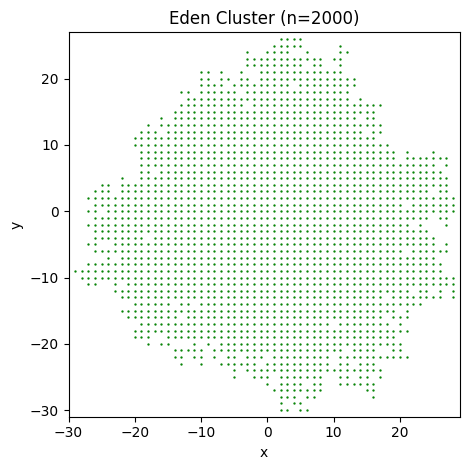

In [10]:
# eden cluster
num = 2000
eden_cluster(num)

# plot
fig, ax = plt.subplots()
ax.set_title('Eden Cluster (n=%d)' % num)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_xlim(min(X)-1, max(X)+1)
ax.set_ylim(min(Y)-1, max(Y)+1)

ax.scatter(X, Y, s=20/np.sqrt(len(X)), c='g')

plt.tight_layout()
plt.show()


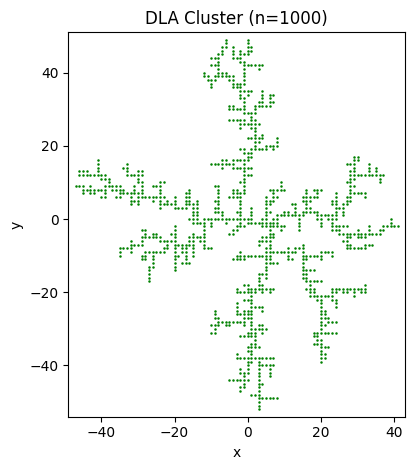

In [14]:
# DLA cluster
num = 1000
# DLA_cluster(num)
# np.savetxt('DLA_cluster_1000.txt', np.array([X, Y]).T, fmt='%d')


# plot
data = np.loadtxt('./data/DLA_cluster_1000.txt', dtype=int)
X, Y = data[:, 0], data[:, 1]

fig, ax = plt.subplots()
ax.set_title('DLA Cluster (n=%d)' % num)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(min(X)-2, max(X)+2)
ax.set_ylim(min(Y)-2, max(Y)+2)
ax.set_aspect('equal')

ax.scatter(X, Y, s=20/np.sqrt(num), c='g')

plt.tight_layout()
plt.show()
